In [1]:
from os import getcwd
from pathlib import Path

import flopy as fp
import pandas as pd

In [2]:
workspace = Path(getcwd(), "model")
workspace

WindowsPath('c:/Users/buckl/Documents/Github/flopy_mf6_work/notebooks/implementing/gwf_fhb/model')

In [3]:
sim_name = "gwf_fhb"
sim = fp.mf6.MFSimulation(
    sim_name=sim_name,
    version="mf6",
    exe_name=Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe"),
    sim_ws=workspace
)
sim

sim_name = gwf_fhb
sim_path = c:\Users\buckl\Documents\Github\flopy_mf6_work\notebooks\implementing\gwf_fhb\model
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = gwf_fhb



In [4]:
fp.mf6.ModflowTdis(
    simulation=sim,
    time_units="days",
    nper=3,
    perioddata=[
        (400.0, 10, 1.0),
        (200.0, 4, 1.0),
        (400.0, 6, 1.0)
    ],
    filename=f"{sim_name}.tdis",
    pname="tdis"
)

package_name = tdis
filename = gwf_fhb.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = gwf_fhb

Block options
--------------------
time_units
{internal}
('days')


Block dimensions
--------------------
nper
{internal}
(3)


Block perioddata
--------------------
perioddata
{internal}
(rec.array([(400., 10, 1.), (200.,  4, 1.), (400.,  6, 1.)],
          dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))



In [5]:
fp.mf6.ModflowIms(
    simulation=sim,
    outer_dvclose=1e-9,
    outer_maximum=50,
    inner_maximum=100,
    inner_dvclose=1e-9,
    rcloserecord=[1e-6, "strict"],
    filename=f"{sim_name}.ims",
    pname="ims"
)

package_name = ims
filename = gwf_fhb.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = gwf_fhb

Block nonlinear
--------------------
outer_dvclose
{internal}
(1e-09)

outer_maximum
{internal}
(50)


Block linear
--------------------
inner_maximum
{internal}
(100)

inner_dvclose
{internal}
(1e-09)

rcloserecord
{internal}
(rec.array([('inner_rclose', 1.e-06, 'strict')],
          dtype=[('inner_rclose_label', 'O'), ('inner_rclose', '<f8'), ('rclose_option', 'O')]))



In [6]:
model = fp.mf6.ModflowGwf(
    simulation=sim,
    modelname=sim_name,
    model_nam_file=f"{sim_name}.nam",
    save_flows=True
)
model

name = gwf_fhb
model_type = gwf6
version = mf6
model_relative_path = .


In [7]:
fp.mf6.ModflowGwfdis(
    model=model,
    length_units="meters",
    nlay=1,
    nrow=3,
    ncol=10,
    delr=1000.0,
    delc=1000.0,
    top=50.0,
    botm=-200.0,
    filename=f"{sim_name}.dis",
    pname="dis"
)

package_name = dis
filename = gwf_fhb.dis
package_type = dis
model_or_simulation_package = model
model_name = gwf_fhb

Block options
--------------------
length_units
{internal}
('meters')


Block dimensions
--------------------
nlay
{internal}
(1)

nrow
{internal}
(3)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 1000.0}

delc
{constant 1000.0}

top
{constant 50.0}

botm
{constant -200.0}



In [8]:
fp.mf6.ModflowGwfnpf(
    model=model,
    save_specific_discharge=True,
    icelltype=0,
    k=20.0,
    filename=f"{sim_name}.npf",
    pname="npf"
)

package_name = npf
filename = gwf_fhb.npf
package_type = npf
model_or_simulation_package = model
model_name = gwf_fhb

Block options
--------------------
save_specific_discharge
{internal}
(True)


Block griddata
--------------------
icelltype
{constant 0}

k
{constant 20.0}



In [9]:
fp.mf6.ModflowGwfic(
    model=model,
    strt=0.0,
    filename=f"{sim_name}.ic",
    pname="ic"
)

package_name = ic
filename = gwf_fhb.ic
package_type = ic
model_or_simulation_package = model
model_name = gwf_fhb

Block griddata
--------------------
strt
{constant 0.0}



In [10]:
fp.mf6.ModflowGwfsto(
    model=model,
    storagecoefficient=True,
    iconvert=0,
    ss=1e-6,
    transient={0: True},
    filename=f"{sim_name}.sto",
    pname="sto"
)

package_name = sto
filename = gwf_fhb.sto
package_type = sto
model_or_simulation_package = model
model_name = gwf_fhb

Block options
--------------------
storagecoefficient
{internal}
(True)


Block griddata
--------------------
iconvert
{constant 0}

ss
{constant 1e-06}

sy
{constant 0.15}


Block period
--------------------
steady-state
None
transient
{internal}
(True)



In [15]:
chd = fp.mf6.ModflowGwfchd(
    model=model,
    maxbound=3,
    stress_period_data=[
        ((0, 0, 9), "chdhead"),
        ((0, 1, 9), "chdhead"),
        ((0, 2, 9), "chdhead")
    ],
    filename=f"{sim_name}.chd",
    pname="chd"
)
chd

package_name = chd
filename = gwf_fhb.chd
package_type = chd
model_or_simulation_package = model
model_name = gwf_fhb

Block dimensions
--------------------
maxbound
{internal}
(3)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001C6390863D0>}


In [16]:
chd_ts_df = pd.DataFrame([
    (0.0, 0.0),
    (307.0, 1.0),
    (791.0, 5.0),
    (1000.0, 2.0)
], columns=["ts_time", "chdhead"])
fp.mf6.ModflowUtlts(
    parent_package=chd,
    time_series_namerecord=chd_ts_df.columns[1],
    interpolation_methodrecord="linearend",
    timeseries=chd_ts_df.to_records(index=False),
    filename=f"{sim_name}.chd.ts",
    pname="chd_ts"
)

package_name = chd_ts
filename = gwf_fhb.chd.ts
package_type = ts
model_or_simulation_package = model
model_name = gwf_fhb
parent_file = chd

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('chdhead',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linearend',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([(   0., 0.), ( 307., 1.), ( 791., 5.), (1000., 2.)],
          dtype=[('ts_time', '<f8'), ('chdhead', '<f8')]))



In [17]:
wel = fp.mf6.ModflowGwfwel(
    model=model,
    maxbound=1,
    stress_period_data=[
        ((0, 1, 0), "flowrate")
    ],
    filename=f"{sim_name}.wel",
    pname="wel"
)
wel

package_name = wel
filename = gwf_fhb.wel
package_type = wel
model_or_simulation_package = model
model_name = gwf_fhb

Block dimensions
--------------------
maxbound
{internal}
(1)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001C6390A3250>}


In [19]:
wel_ts_df = pd.DataFrame([
    (0.0, 2000.0),
    (307.0, 6000.0),
    (791.0, 5000.0),
    (1000.0, 9000.0)
], columns=["ts_time", "flowrate"])
fp.mf6.ModflowUtlts(
    parent_package=wel,
    time_series_namerecord=wel_ts_df.columns[1],
    interpolation_methodrecord="linearend",
    timeseries=wel_ts_df.to_records(index=False),
    filename=f"{sim_name}.wel.ts",
    pname="wel_ts"
)

package_name = wel_ts
filename = gwf_fhb.wel.ts
package_type = ts
model_or_simulation_package = model
model_name = gwf_fhb
parent_file = wel

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('flowrate',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linearend',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([(   0., 2000.), ( 307., 6000.), ( 791., 5000.), (1000., 9000.)],
          dtype=[('ts_time', '<f8'), ('flowrate', '<f8')]))



In [20]:
fp.mf6.ModflowGwfoc(
    model=model,
    budget_filerecord=[f"{sim_name}.cbc"],
    head_filerecord=[f"{sim_name}.hds"],
    saverecord=[
        ("head", "all"),
        ("budget", "all")
    ],
    filename=f"{sim_name}.oc",
    pname="oc"
)

package_name = oc
filename = gwf_fhb.oc
package_type = oc
model_or_simulation_package = model
model_name = gwf_fhb

Block options
--------------------
budget_filerecord
{internal}
(rec.array([('gwf_fhb.cbc',)],
          dtype=[('budgetfile', 'O')]))

head_filerecord
{internal}
(rec.array([('gwf_fhb.hds',)],
          dtype=[('headfile', 'O')]))


Block period
--------------------
saverecord
{internal}
(rec.array([('head', 'all', None), ('budget', 'all', None)],
          dtype=[('rtype', 'O'), ('ocsetting', 'O'), ('ocsetting_data', 'O')]))

printrecord
None


In [21]:
fp.mf6.ModflowUtlobs(
    parent_model_or_package=model,
    continuous={
        f"{sim_name}.obs.flow.csv": [
            ("icf1", "flow-ja-face", (0, 1, 1), (0, 1, 0))
        ],
        f"{sim_name}.obs.head.csv": [
            ("h1_2_1", "head", (0, 1, 0), None),
            ("h1_2_10", "head", (0, 1, 9), None)
        ]
    },
    filename=f"{sim_name}.obs",
    pname="obs"
)

package_name = obs
filename = gwf_fhb.obs
package_type = obs
model_or_simulation_package = model
model_name = gwf_fhb

Block continuous
--------------------
continuous
{internal}
(rec.array([('h1_2_1', 'head', (0, 1, 0), None),
           ('h1_2_10', 'head', (0, 1, 9), None)],
          dtype=[('obsname', 'O'), ('obstype', 'O'), ('id', 'O'), ('id2', 'O')]))



In [22]:
sim.check()

Checking model "gwf_fhb"...

gwf_fhb MODEL DATA VALIDATION SUMMARY:
  1 Warning:
    sto package: STORAGECOEFFICIENT option is activated, storage values are read storage coefficients

  Checks that passed:
    npf package: zero or negative horizontal hydraulic conductivity values
    npf package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    npf package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    sto package: zero or negative specific storage values
    sto package: specific storage values below checker threshold of 1e-06
    sto package: specific storage values above checker threshold of 0.01
    chd package: BC indices valid
    chd package: not a number (Nan) entries
    chd package: BC in inactive cells
    wel package: BC indices valid
    wel package: not a number (Nan) entries
    wel package: BC in inactive cells

Checking for missing simulation packages...


In [23]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model gwf_fhb...
    writing model name file...
    writing package dis...
    writing package npf...
    writing package ic...
    writing package sto...
    writing package chd...
    writing package chd_ts...
    writing package wel...
    writing package wel_ts...
    writing package oc...
    writing package obs...


In [24]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\Software\mf6.4.1\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 09 2022 18:18:37 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the US

(True, [])

In [25]:
sim.delete_output_files()

In [44]:
import matplotlib.pyplot as plt

In [27]:
head_obs_df = pd.read_csv(Path(getcwd(), "model", "gwf_fhb.obs.head.csv"))
head_obs_df

,time,H1_2_1,H1_2_10
0,40.000000,1.731393,0.130293
1,80.000000,2.192909,0.260586
2,120.000000,2.654234,0.390879
3,160.000000,3.115560,0.521173
4,200.000000,3.576885,0.651466
5,240.000000,4.038211,0.781759
6,280.000000,4.499537,0.912052
7,320.000000,4.901313,1.107438
8,360.000000,5.179407,1.438017
9,400.000000,5.457492,1.768595


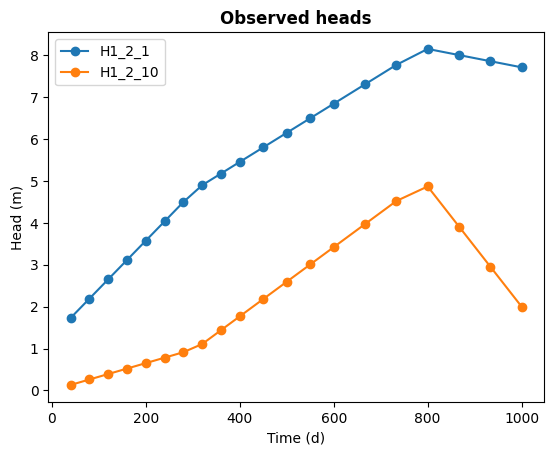

In [52]:
fig, ax = plt.subplots()
ax.plot("time", "H1_2_1", 'o-', data=head_obs_df, label="H1_2_1")
ax.plot("time", "H1_2_10", 'o-', data=head_obs_df, label="H1_2_10")
ax.set_title("Observed heads", fontweight="bold")
ax.set_xlabel("Time (d)")
ax.set_ylabel("Head (m)")
ax.legend();

In [40]:
flow_obs_df = pd.read_csv(Path(getcwd(), "model", "gwf_fhb.obs.flow.csv"))
flow_obs_df

,time,ICF1
0,40.000000,1191.149007
1,80.000000,1437.420221
2,120.000000,1683.661147
3,160.000000,1929.902069
4,200.000000,2176.142991
5,240.000000,2422.383912
6,280.000000,2668.624834
7,320.000000,2822.148364
8,360.000000,2783.103658
9,400.000000,2744.056157


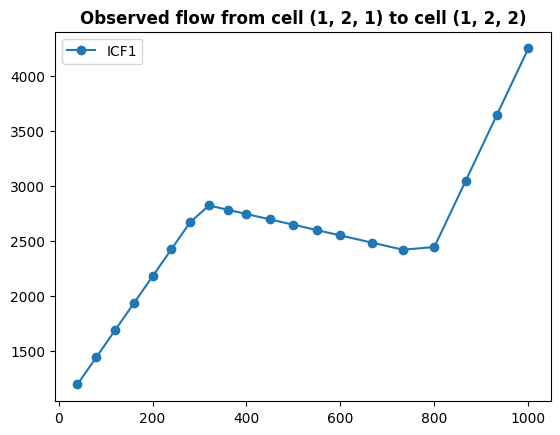

In [51]:
fig, ax = plt.subplots()
ax.plot("time", "ICF1", 'o-', data=flow_obs_df, label="ICF1")
ax.set_title("Observed flow from cell (1, 2, 1) to cell (1, 2, 2)", fontweight="bold")
ax.legend();